# Check Qiskit Version

In [4]:
from qiskit import version
version._get_qiskit_versions()

{'qiskit': '0.11.1',
 'qiskit-terra': '0.8.2',
 'qiskit-ignis': '0.1.1',
 'qiskit-aer': '0.2.3',
 'qiskit-ibmq-provider': '0.3.1',
 'qiskit-aqua': '0.5.3'}

## Quantum Circuit Basics

### Example: Bell State

In [5]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [6]:
# Create a Quantum Register with 5 qubits.
qr = QuantumRegister(5, 'q')

# Create a Classical Register with 5 bits.
cr = ClassicalRegister(5, 'c')

# Create a Quantum Circuit acting on the q register
Q_circuit = QuantumCircuit(qr,cr)

In [7]:
# Add a H gate on qubit 0, putting this qubit in superposition.
Q_circuit.h(qr[0])

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting the qubits in a Bell state.
Q_circuit.cx(qr[0], qr[1])


### Measurement

In [8]:
# Map the quantum measurement to the classical bits
Q_circuit.measure(qr[0], cr[0])
Q_circuit.measure(qr[1], cr[1])

### Visualize Circuit

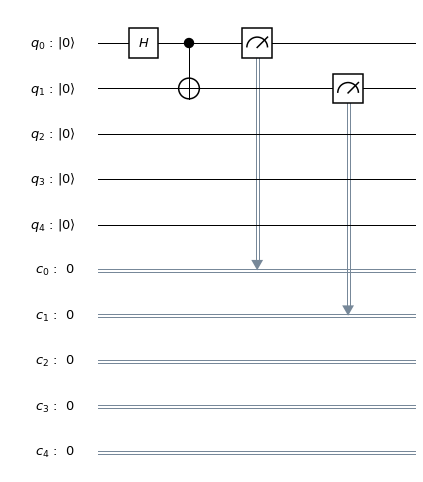

In [9]:
%matplotlib inline
Q_circuit.draw(output='mpl')

### Simulation

In [10]:
from qiskit import Aer, execute

In [11]:
Q_simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator with 1024 shots
job_sim = execute(Q_circuit, Q_simulator, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [12]:
counts = result_sim.get_counts(Q_circuit)
print(counts)

{'00000': 487, '00011': 537}


### Plot histogram

In [13]:
from qiskit.tools.visualization import plot_histogram

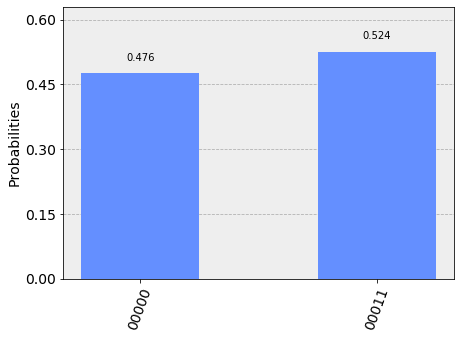

In [14]:
plot_histogram(counts)

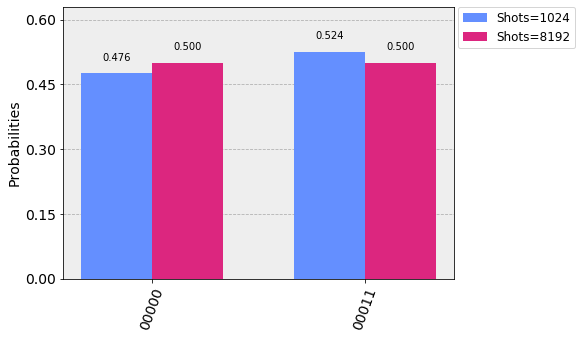

In [15]:
# Execute two qubit Bell state again with 8192 shots
result2 = execute(Q_circuit, Q_simulator, shots=8192).result()
counts2  = result2.get_counts(Q_circuit)
# Plot results with legend
legend = ['Shots=1024', 'Shots=8192']
plot_histogram([counts, counts2], legend=legend)

# Running circuits using the Real Quantum Computer

### Check the account:

In [16]:
from qiskit import IBMQ

In [19]:
account_api='YOUR_TOKEN'

IBMQ.save_account(account_api,overwrite=True)
IBMQ.load_account()
print('Available Providers: ')
IBMQ.providers()

Available Providers: 


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-hub-ntu', group='ntu-internal', project='default')>]

In [20]:
device_public=IBMQ.get_provider(hub='ibm-q').backends()
print("Open Account Device:")
device_public

Open Account Device:


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx4') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [21]:
device_ntu=IBMQ.get_provider(hub='ibm-q-hub-ntu').backends()
print("NTU Account Device:")
device_ntu

NTU Account Device:


[<IBMQBackend('ibmq_20_tokyo') from IBMQ(hub='ibm-q-hub-ntu', group='ntu-internal', project='default')>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(hub='ibm-q-hub-ntu', group='ntu-internal', project='default')>,
 <IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-hub-ntu', group='ntu-internal', project='default')>]

### Select Device:

In [22]:
device_to_run = IBMQ.get_provider(hub='ibm-q-hub-ntu').get_backend('ibmq_poughkeepsie')
device_to_run.status()

BackendStatus(backend_name='ibmq_poughkeepsie', backend_version='1.2.0', operational=True, pending_jobs=0, status_msg='active')

In [23]:
device_to_run2 = IBMQ.get_provider(hub='ibm-q').get_backend('ibmqx4')
device_to_run2.status()

BackendStatus(backend_name='ibmqx4', backend_version='1.0.0', operational=True, pending_jobs=1, status_msg='active')

### Run on selected device:

In [24]:
Q_real_device = device_to_run
job_QC = execute(Q_circuit, Q_real_device,shots=100)

In [25]:
print("Job ID: ")
job_QC.job_id()

Job ID: 


'5d4931fe22eb3a001292d330'

In [26]:
## Properties of backends
from qiskit.tools.jupyter import *
%qiskit_backend_monitor device_to_run2

/Users/tsaicheng/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


### Check the job status

In [21]:
from qiskit.tools.monitor import job_monitor
job_monitor(job_QC, monitor_async=True)

HTML(value="<p style='font-size:16px;'>Job Status: job is actively running </p>")

In [23]:
job_QC.status()

<JobStatus.DONE: 'job has successfully run'>

## Compare to simulation result:

In [24]:
real_result = job_QC.result()
print(real_result.get_counts(Q_circuit))

{'00000': 57, '00011': 39, '00010': 4}


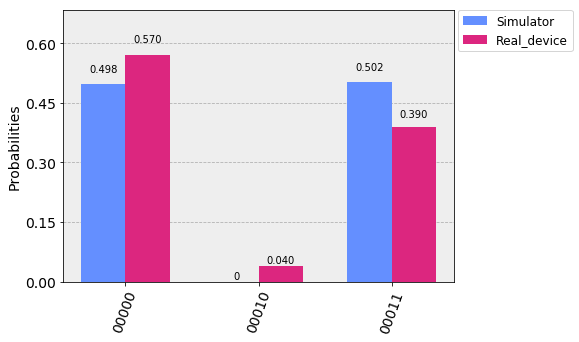

In [25]:
# Plot results with legend
legend = ['Simulator', 'Real_device']
plot_histogram([counts2, real_result.get_counts(Q_circuit)], legend=legend)

## Check Previous Result

In [26]:
previous_result=device_to_run.retrieve_job(job_id='5d487a22d1e4f20012b5d926')

In [27]:
previous_result.status()

<JobStatus.DONE: 'job has successfully run'>

In [28]:
previous_result.result().get_counts()

{'00000': 57, '00011': 39, '00010': 4}